# 0.Instalar e importar dependencias


In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

In [3]:
import mediapipe as mp
import cv2
import numpy as np

In [4]:
mp_drawing=mp.solutions.drawing_utils
mp_pose=mp.solutions.pose

1. Hacer algunas detecciones
Probar el funcionamiento de la camara y las librerias de mediapipe y opencv

In [6]:
cap= cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret,image=cap.read()

        #Recolor Feed 
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable=False

        #Make desicions
        results=pose.process(image)
        #Recolor image vack to bgr for rendering
        image.flags.writeable=True
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_pose.POSE_CONNECTIONS
                              , mp_drawing.DrawingSpec(color=(2.45,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                        )
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# 1.2. Guardar Video

In [ ]:
cap=cv2.VideoCapture(0)

height= cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
fps=cap.get(cv2.CAP_PROP_FPS)
videoWriter=cv2.VideoWriter('videoDemo2.avi',cv2.VideoWriter_fourcc('P','I','M','1'),fps,(int(width),int(height)))

while cap.isOpened():
    ret,frame=cap.read()

    try:
        cv2.imshow('videoDemo2',frame)
        videoWriter.write(frame)
    except Exception as e:
        break

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
videoWriter.release()
cv2.destroyAllWindows()

# 2. Capturar puntos de referencia ('land_marks') & Exportar el CSV 

In [15]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
landmarks=['class']
for val in range(1,33+1):
    landmarks +=['x{}'.format(val),'y{}'.format(val),'z{}'.format(val),'v{}'.format(val)]

In [ ]:
Mostramos los titulos de las columnas que va estar en nuestro dataset csv

In [ ]:
landmarks[1:]

la siguiente sirve para crear el csv y establecer la plantilla del dataset.csv y se envia los titulos creados en el paso anterior 

In [ ]:
with open('coordenadas.csv',mode='w',newline='') as f:
    csv_writer=csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

Funcion que exporta los landmarks al csv 

In [ ]:
def export_landmark(results,action):
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
        keypoints.insert(0,action)
        with open('coordenadas.csv',mode='a',newline='') as f:
            csv_writer=csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass

In [ ]:
Ejemplo de resultados que seran enviados al dataset 

In [ ]:
results.pose_landmarks

In [14]:
export_landmark(results,'up')

permite guardar los landmarks presionando las teclas 'u' y 'd'

In [12]:
cap=cv2.VideoCapture('videoDeMO.avi')

with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret,image=cap.read()

        #Recolor Feed 
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable=False

        #Make desicions
        results=pose.process(image)
        #Recolor image vack to bgr for rendering
        image.flags.writeable=True
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_pose.POSE_CONNECTIONS
                              , mp_drawing.DrawingSpec(color=(2.45,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                        )
        k=cv2.waitKey(1)
        if k==117: 
            export_landmark(results,'up')
        if k==100: 
            export_landmark(results,'down')

        cv2.imshow('Raw Webcam Feed',image)

        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        

C:\Users\Alex\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


# 3. Entrenar Custom Model usando scikit learn 

## 3.1 Leer los datos colectados y procesar

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
df=pd.read_csv('coordenadas.csv')

In [19]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,up,0.732712,0.659803,-1.730769,0.999583,0.770213,0.580847,-1.724189,0.999157,0.793546,...,1.025919,0.000009,0.641183,3.192660,0.115102,0.000028,0.461827,3.146240,0.294422,0.000028
1,up,0.732712,0.659803,-1.730769,0.999583,0.770213,0.580847,-1.724189,0.999157,0.793546,...,1.025919,0.000009,0.641183,3.192660,0.115102,0.000028,0.461827,3.146240,0.294422,0.000028
2,up,0.396287,0.338501,-0.548881,0.999995,0.404107,0.320943,-0.523119,0.999984,0.408637,...,-0.097334,0.959178,0.469107,0.876925,-0.255437,0.976176,0.309335,0.885474,-0.276009,0.989417
3,down,0.404344,0.120360,-0.363994,0.999995,0.413334,0.104852,-0.341984,0.999983,0.418007,...,0.186841,0.930230,0.473995,0.879874,0.054785,0.987474,0.313811,0.885181,0.012346,0.991998
4,down,0.391953,0.299292,-0.591811,0.999998,0.400712,0.282283,-0.568356,0.999993,0.405515,...,-0.130703,0.944870,0.466406,0.879645,-0.279956,0.988931,0.301478,0.892188,-0.316001,0.992770


In [23]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
1276,down,0.390645,0.120623,-0.430364,0.999997,0.399483,0.105098,-0.410868,0.999991,0.404178,...,0.186688,0.958890,0.479194,0.884072,0.006287,0.992442,0.285725,0.888851,0.008715,0.994456
1277,up,0.390419,0.116751,-0.444551,0.999997,0.399283,0.101031,-0.425235,0.999990,0.404127,...,0.192204,0.954263,0.475120,0.882204,0.021425,0.993022,0.286449,0.888556,0.009640,0.994797
1278,up,0.359087,0.114114,-0.504386,0.999997,0.366294,0.099765,-0.484590,0.999987,0.371902,...,0.213746,0.946350,0.475887,0.883447,0.022942,0.994547,0.284593,0.891115,0.028858,0.995360
1279,up,0.346537,0.106225,-0.490363,0.999997,0.354584,0.093044,-0.469184,0.999988,0.360448,...,0.189243,0.945198,0.470587,0.879905,0.000641,0.994733,0.284567,0.892025,0.008169,0.995268
1280,up,0.337010,0.100312,-0.473063,0.999997,0.346326,0.086664,-0.449580,0.999990,0.351953,...,0.158484,0.941242,0.439507,0.890591,-0.041942,0.994684,0.284394,0.894289,-0.026820,0.995002


In [25]:
df[df['class']=='up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,up,0.732712,0.659803,-1.730769,0.999583,0.770213,0.580847,-1.724189,0.999157,0.793546,...,1.025919,0.000009,0.641183,3.192660,0.115102,0.000028,0.461827,3.146240,0.294422,0.000028
1,up,0.732712,0.659803,-1.730769,0.999583,0.770213,0.580847,-1.724189,0.999157,0.793546,...,1.025919,0.000009,0.641183,3.192660,0.115102,0.000028,0.461827,3.146240,0.294422,0.000028
2,up,0.396287,0.338501,-0.548881,0.999995,0.404107,0.320943,-0.523119,0.999984,0.408637,...,-0.097334,0.959178,0.469107,0.876925,-0.255437,0.976176,0.309335,0.885474,-0.276009,0.989417
5,up,0.402487,0.150183,-0.416346,0.999996,0.410311,0.134713,-0.395485,0.999986,0.414508,...,0.173776,0.956837,0.476821,0.881846,0.010774,0.985409,0.300426,0.888077,0.005395,0.991791
8,up,0.407725,0.135464,-0.428831,0.999997,0.416205,0.119851,-0.406514,0.999991,0.420419,...,0.162550,0.960714,0.479448,0.881771,0.003393,0.988639,0.300323,0.887631,-0.014727,0.993329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,up,0.395235,0.120706,-0.471242,0.999997,0.403292,0.104721,-0.452089,0.999990,0.407461,...,0.189126,0.939890,0.477020,0.883353,0.014075,0.995010,0.286902,0.891060,0.001203,0.995604
1277,up,0.390419,0.116751,-0.444551,0.999997,0.399283,0.101031,-0.425235,0.999990,0.404127,...,0.192204,0.954263,0.475120,0.882204,0.021425,0.993022,0.286449,0.888556,0.009640,0.994797
1278,up,0.359087,0.114114,-0.504386,0.999997,0.366294,0.099765,-0.484590,0.999987,0.371902,...,0.213746,0.946350,0.475887,0.883447,0.022942,0.994547,0.284593,0.891115,0.028858,0.995360
1279,up,0.346537,0.106225,-0.490363,0.999997,0.354584,0.093044,-0.469184,0.999988,0.360448,...,0.189243,0.945198,0.470587,0.879905,0.000641,0.994733,0.284567,0.892025,0.008169,0.995268


In [27]:
X=df.drop('class',axis=1)
y=df['class']

In [29]:
#Check shape
print(X.shape)
print (y.shape)

(1281, 132)
(1281,)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [33]:
y_test

686     down
628       up
1139      up
631       up
444       up
        ... 
936       up
1012    down
1034      up
811     down
155     down
Name: class, Length: 385, dtype: object

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(896, 132)
(385, 132)
(896,)
(385,)


# 3.2 Entrenar machine learning de  modelo de clasificacion 

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
pipelines={
    'lr': make_pipeline(StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(StandardScaler(),RidgeClassifier()),
    'rf': make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=30))
}

In [42]:
fit_models={}
for algo, pipeline in pipelines.items():
    model=pipeline.fit(X_train,y_train)
    fit_models[algo]=model

In [43]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=30))])}

In [46]:
y_pred=fit_models['lr'].predict(X_test)
rc_pred=fit_models['rc'].predict(X_test)
rf_pred=fit_models['rf'].predict(X_test)

In [48]:
# Use matriz de confusion para revisar predicciones 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 3.2.1. Logistic Regression

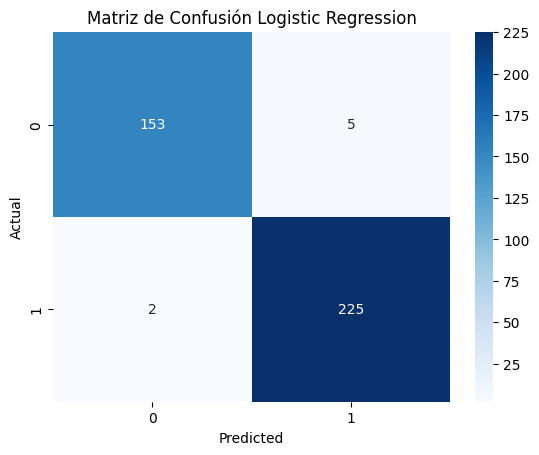

In [50]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión Logistic Regression')
plt.show()

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        down       0.99      0.97      0.98       158
          up       0.98      0.99      0.98       227

    accuracy                           0.98       385
   macro avg       0.98      0.98      0.98       385
weighted avg       0.98      0.98      0.98       385



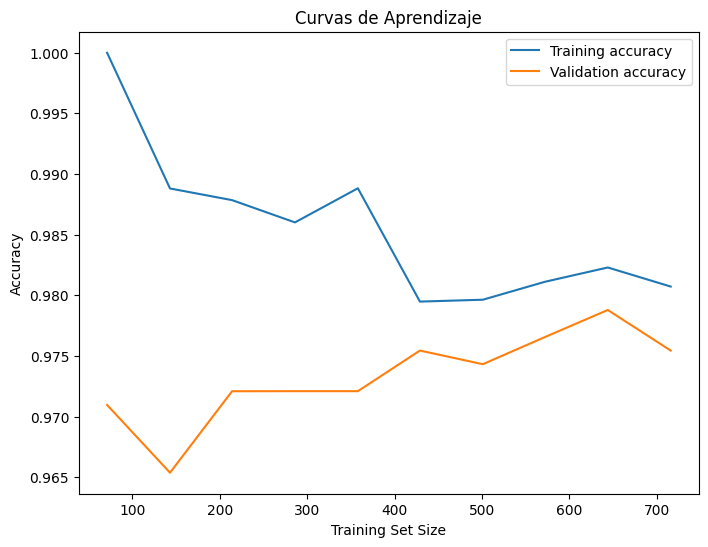

In [67]:
train_sizes, train_scores, test_scores = learning_curve(
    fit_models['lr'], X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Curvas de Aprendizaje - Logistic Regression')
plt.legend(loc='best')
plt.show()

# 3.2.2. Ridge Classifier

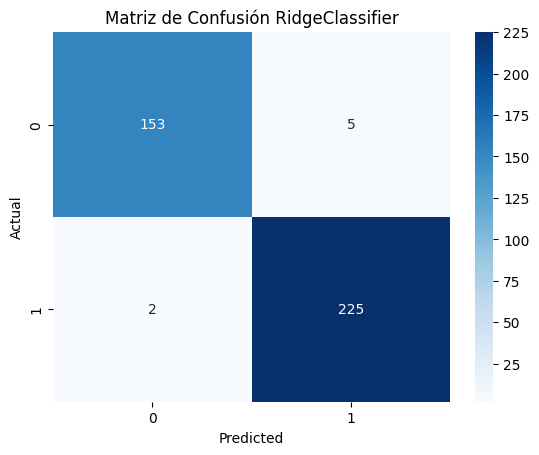

In [54]:
cm2 = confusion_matrix(y_test, rc_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión RidgeClassifier')
plt.show()

In [56]:
print(classification_report(y_test,rc_pred))

              precision    recall  f1-score   support

        down       0.99      0.97      0.98       158
          up       0.98      0.99      0.98       227

    accuracy                           0.98       385
   macro avg       0.98      0.98      0.98       385
weighted avg       0.98      0.98      0.98       385



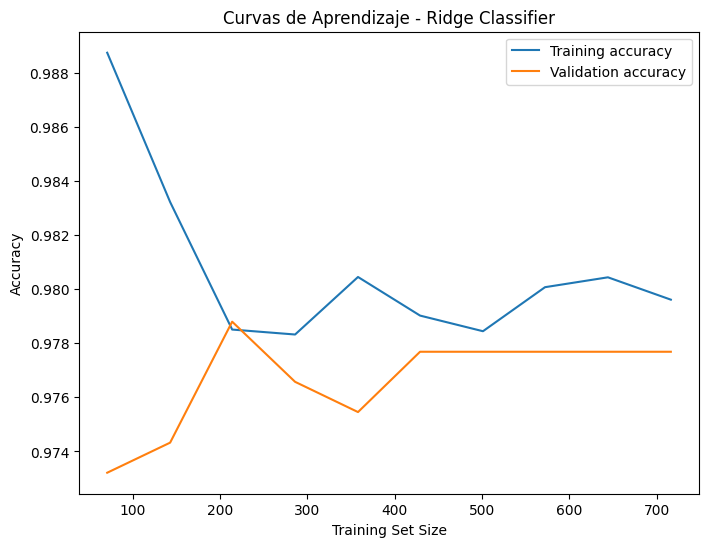

In [71]:
train_sizes, train_scores, test_scores = learning_curve(
    fit_models['rc'], X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Curvas de Aprendizaje - Ridge Classifier')
plt.legend(loc='best')
plt.show()

# 3.2.3. Random Forest

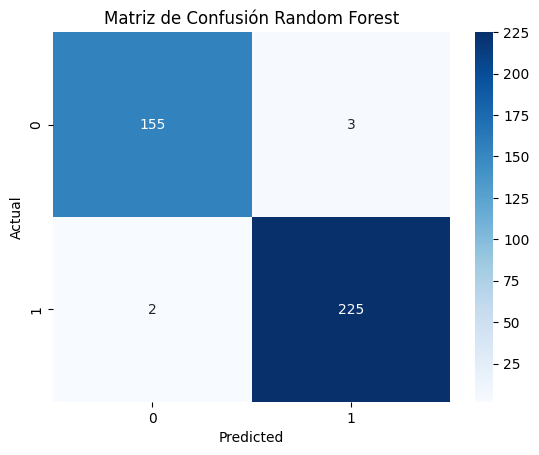

In [58]:
cm3 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión Random Forest')
plt.show()

In [60]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

        down       0.99      0.98      0.98       158
          up       0.99      0.99      0.99       227

    accuracy                           0.99       385
   macro avg       0.99      0.99      0.99       385
weighted avg       0.99      0.99      0.99       385



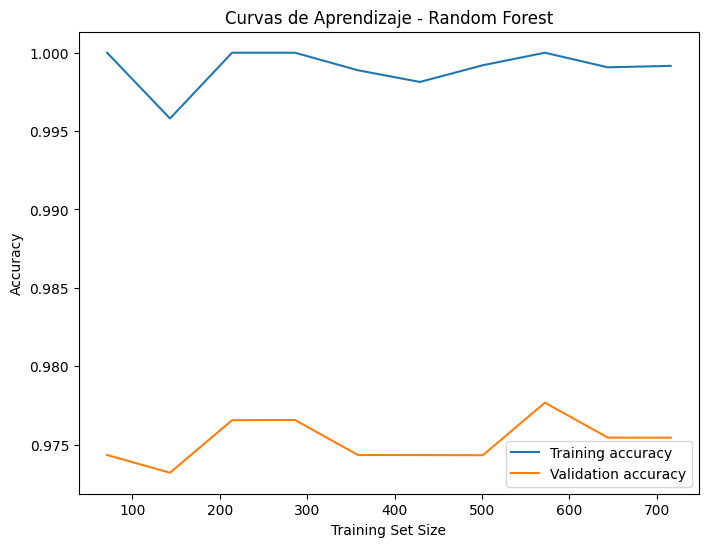

In [92]:
train_sizes, train_scores, test_scores = learning_curve(
    fit_models['rf'], X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Curvas de Aprendizaje - Random Forest')
plt.legend(loc='best')
plt.show()

# 3.2.4. Serializar Model

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score #Accuracy metrics
import pickle

In [78]:
yhat=fit_models['rf'].predict(X_test)

In [80]:
 with open('proyecto1B.pkl','wb')as f:
     pickle.dump(fit_models['rf'],f)

# 4. Hacer Detecciones con el modelo 

In [82]:
with open('proyecto1B.pkl','rb') as f:
    model=pickle.load(f)

In [84]:
row=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
X=pd.DataFrame([row],columns=landmarks[1:])

NameError: name 'results' is not defined

In [86]:
# Inicializar mediapipe
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Inicializar el modelo de VideoCapture
cap = cv2.VideoCapture(0)

counter = 0
current_stage = ''

# Inicializar el modelo de pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolorear el feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Hacer decisiones
        results = pose.process(image)

        # Recolorear la imagen de nuevo a BGR para renderizar
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Dibujar las landmarks de la pose
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

            try:
                # Obtener las landmarks
                row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
                
                # Asegúrate de definir 'landmarks' y 'model' en tu contexto
                X = pd.DataFrame([row], columns=landmarks[1:])
                body_language_class = model.predict(X)[0]
                body_language_prob = model.predict_proba(X)[0]
               
                print(body_language_class, body_language_prob)

                if body_language_class=="down" and body_language_prob[body_language_prob.argmax()]>0.7:
                    current_stage="down" 
                elif current_stage=="down" and body_language_class=="up" and body_language_prob[body_language_prob.argmax()]>0.7:
                    current_stage="up"
                    counter +=1
                    print(current_stage)

                # Dibujar los cuadros de las etiquetas
                cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)

                cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # Mostrar la probabilidad
                cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # Mostrar el contador
                cv2.putText(image, 'COUNT', (180, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(counter), (175, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            except Exception as e:
                print(f"Error: {e}")
                pass

        cv2.imshow('Raw Webcam Feed', image)
        # Captura la tecla 'r' para resetear el contador y el estado
        if cv2.waitKey(10) & 0xFF == ord('r'):
            counter = 0
            current_stage = ''
            print("Reset done!")

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


cap.release()
cv2.destroyAllWindows()


In [87]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=30))])